# Import Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [2]:
data_file = pd.read_csv('C:\\Users\\DELL\\Desktop\\python Progs\\FIFA 2018 Statistics.csv')
data_file['Result']=np.nan
for i in range(0,128,2):
    a_goals=data_file.iloc[i]['Goal Scored']
    b_goals=data_file.iloc[i+1]['Goal Scored']
    if a_goals>b_goals:
        data_file.iloc[i,-1]=1
        data_file.iloc[i+1,-1]=-1
    elif b_goals>a_goals:
        data_file.iloc[i,-1]=-1
        data_file.iloc[i+1,-1]=1
    else:
        data_file.iloc[i,-1]=0
        data_file.iloc[i+1,-1]=0
        
#Changing the categorical feature 'Man of the Match' :'Yes', 'No' to 1, 0
data_file.rename(columns={'Man of the Match':'MoM'},inplace=True)
data_file.MoM = data_file.MoM.replace(['Yes','No'],[1,0])

data_file.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow & Red,Red,MoM,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,Result
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,1,12.0,Group Stage,No,0,NaN,NaN,1.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,NaN,Group Stage,No,0,NaN,NaN,-1.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,0,0,0,NaN,Group Stage,No,0,NaN,NaN,-1.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,1,89.0,Group Stage,No,0,NaN,NaN,1.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,0,0,0,NaN,Group Stage,No,0,1.0,90.0,-1.0


In [3]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [4]:
missing_df = pd.DataFrame()
missing_df['Feature'] = data_file.isnull().sum().sort_values(ascending = False).index
missing_df['Count of Missing Values'] = data_file.isnull().sum().sort_values(ascending = False).values
missing_df['Percentage of Missing Values'] = missing_df['Count of Missing Values']*100 / len(data_file)
missing_df

,Feature,Count of Missing Values,Percentage of Missing Values
0,Own goals,116,90.6250
1,Own goal Time,116,90.6250
2,1st Goal,34,26.5625
3,Result,0,0.0000
4,Free Kicks,0,0.0000
5,Team,0,0.0000
6,Opponent,0,0.0000
7,Goal Scored,0,0.0000
8,Ball Possession %,0,0.0000
9,Attempts,0,0.0000


In [5]:
data_file['Own goals'].fillna(0, inplace = True)
data_file['Own goal Time'].fillna(0, inplace = True)
data_file['1st Goal'].fillna(0, inplace = True)

# Outlier Detection

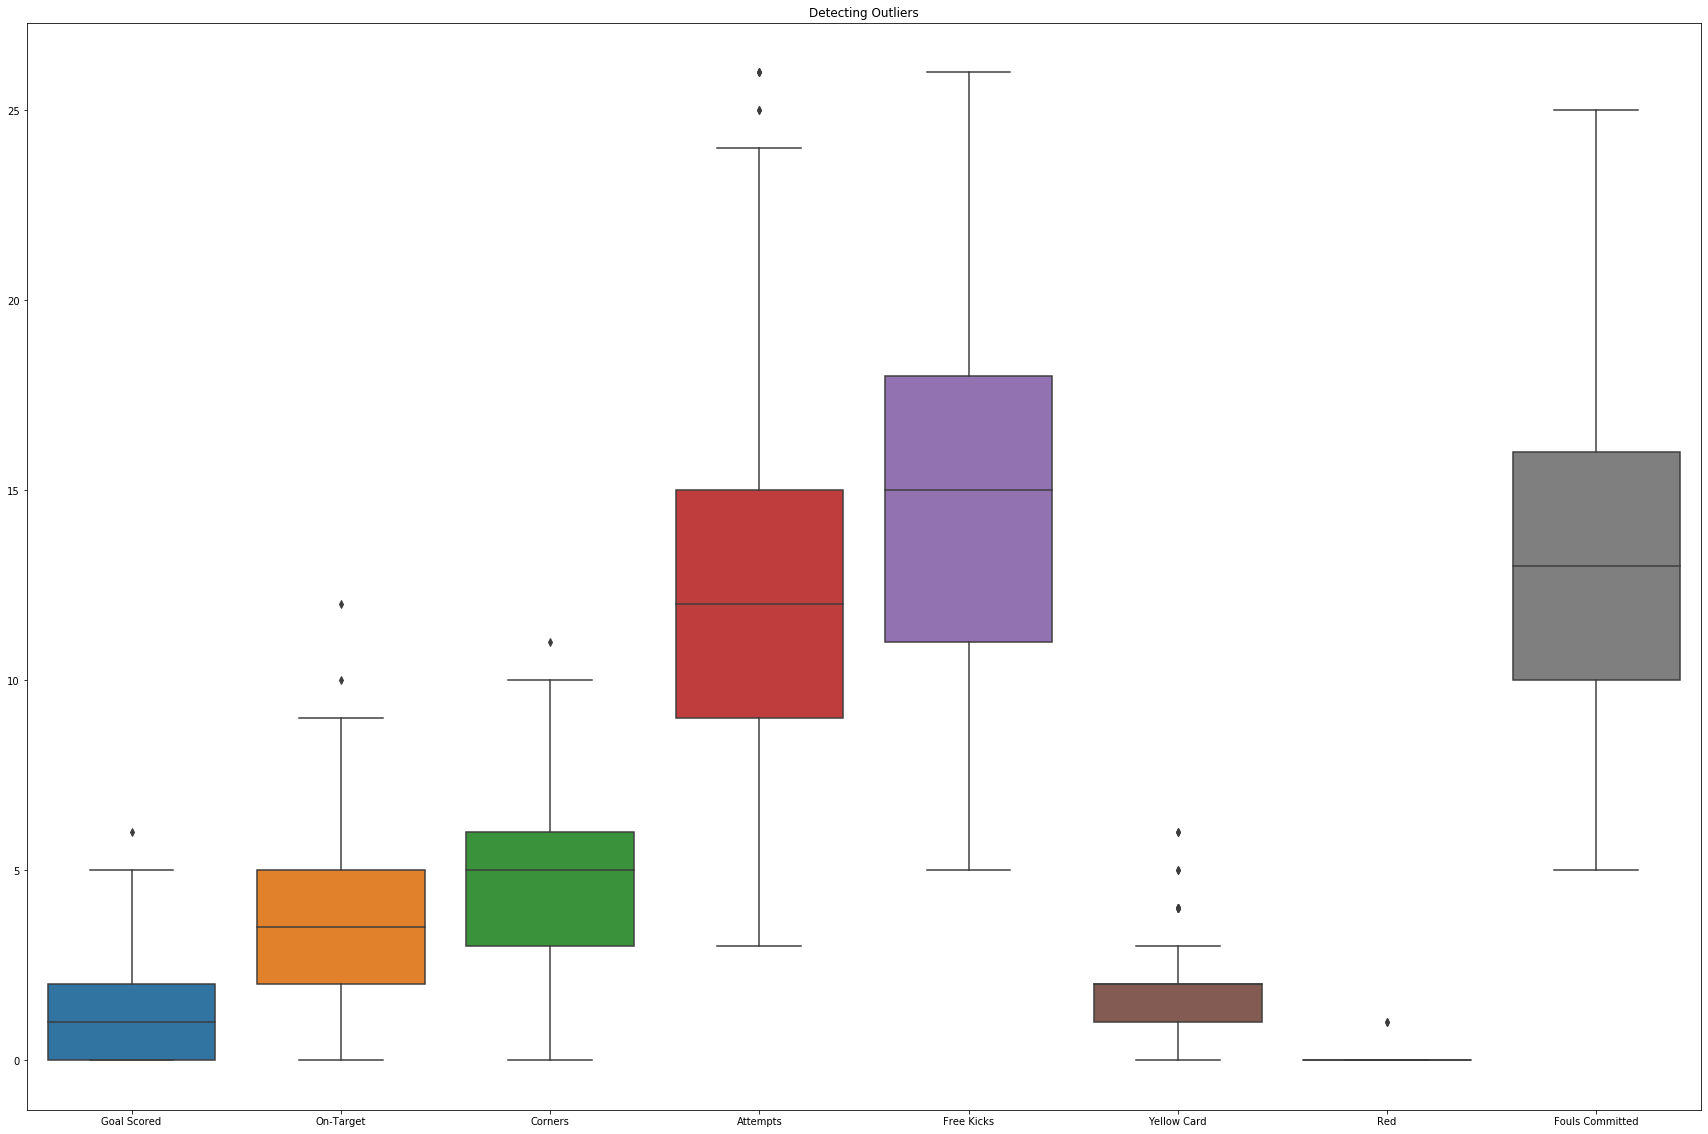

In [6]:
var1 = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 'Fouls Committed']
dummy_data = data_file[var1]
plt.figure(figsize=(30,20))
sns.boxplot(data = dummy_data)
plt.title('Detecting Outliers')
plt.show()

In [7]:
def find_outliers(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    #data = data[~((data < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
    #boston_df_out.shape
    return outlier_indices, outlier_values

In [8]:
num_cols = ['Goal Scored','Ball Possession %', 'Attempts', 'On-Target', 'Off-Target',
           'Blocked', 'Corners', 'Offsides', 'Free Kicks',
           'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed',
           'Yellow Card', 'Yellow & Red', 'Red', 'MoM', '1st Goal', 'Goals in PSO',
           'Own goals', 'Own goal Time', 'Result']

master_indices = []
for i in num_cols:
    indices, vals = find_outliers(data_file[i])
    master_indices.append(indices)
    print("Outliers for ", i)
    print("Total = ", len(vals))
    #data_file.drop(indices, inplace = True)
    print(np.sort(vals))

Outliers for  Goal Scored
Total =  1
[6]
Outliers for  Ball Possession %
Total =  0
[]
Outliers for  Attempts
Total =  5
[25 25 26 26 26]
Outliers for  On-Target
Total =  2
[10 12]
Outliers for  Off-Target
Total =  0
[]
Outliers for  Blocked
Total =  10
[ 8  8  8  8  9  9  9 10 10 10]
Outliers for  Corners
Total =  1
[11]
Outliers for  Offsides
Total =  0
[]
Outliers for  Free Kicks
Total =  0
[]
Outliers for  Saves
Total =  3
[9 9 9]
Outliers for  Pass Accuracy %
Total =  0
[]
Outliers for  Passes
Total =  1
[1137]
Outliers for  Distance Covered (Kms)
Total =  12
[ 80  83 132 135 136 137 139 143 143 146 148 148]
Outliers for  Fouls Committed
Total =  0
[]
Outliers for  Yellow Card
Total =  12
[4 4 4 4 4 4 4 4 5 5 6 6]
Outliers for  Yellow & Red
Total =  2
[1 1]
Outliers for  Red
Total =  2
[1 1]
Outliers for  MoM
Total =  0
[]
Outliers for  1st Goal
Total =  0
[]
Outliers for  Goals in PSO
Total =  8
[2 3 3 3 3 4 4 4]
Outliers for  Own goals
Total =  12
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

# Summary of the dataset

In [9]:
data_file.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Fouls Committed,Yellow Card,Yellow & Red,Red,MoM,1st Goal,Goals in PSO,Own goals,Own goal Time,Result
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,13.546875,1.695312,0.015625,0.015625,0.500000,28.976562,0.203125,0.093750,4.296875,0.000000
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,4.619131,1.325454,0.124507,0.124507,0.501965,27.304196,0.807049,0.292626,16.053728,0.896186
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,13.000000,2.000000,0.000000,0.000000,0.500000,23.500000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,16.000000,2.000000,0.000000,0.000000,1.000000,51.000000,0.000000,0.000000,0.000000,1.000000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,25.000000,6.000000,1.000000,1.000000,1.000000,90.000000,4.000000,1.000000,90.000000,1.000000


# Insights in the data'

univariate analysis

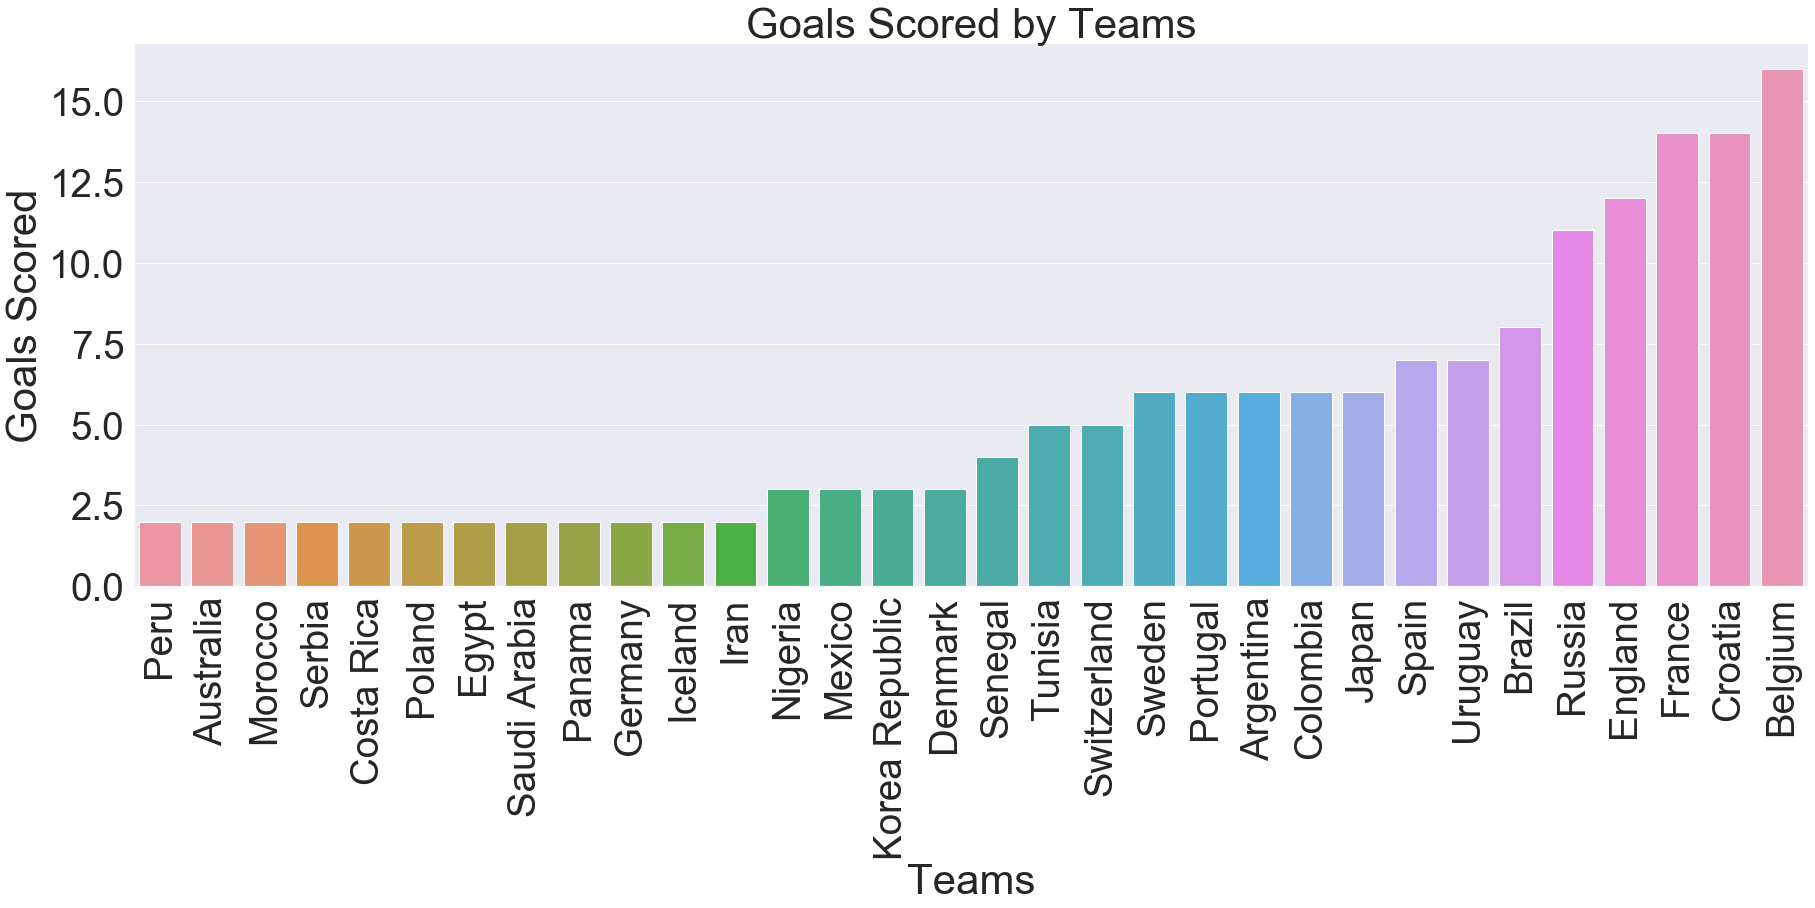

In [10]:
plt.figure(figsize = (30,10))
Goals_sorted_sum = data_file.groupby('Team')['Goal Scored'].sum().reset_index().sort_values(by=('Goal Scored'), ascending=True)

sns.set(font_scale=3.5)
plot1 = sns.barplot(x='Team', y='Goal Scored', data=Goals_sorted_sum)

plot1.set_xticklabels(Goals_sorted_sum['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Goals Scored')
plot1.set_title('Goals Scored by Teams')
plt.show()

# Feature Distribution

In [11]:
def plot_cols(arr):
    plt.figure(figsize=(40,40))
    for i in range(len(arr)):
        plt.subplot(4,3,i+1)
        plt.title(arr[i])
        data_file[data_file['Result']==1][arr[i]].plot(kind='kde',legend=True,label='wins')
        data_file[data_file['Result']==-1][arr[i]].plot(kind='kde',legend=True,label='losses')
        data_file[data_file['Result']==0][arr[i]].plot(kind='kde',legend=True,label='draws')

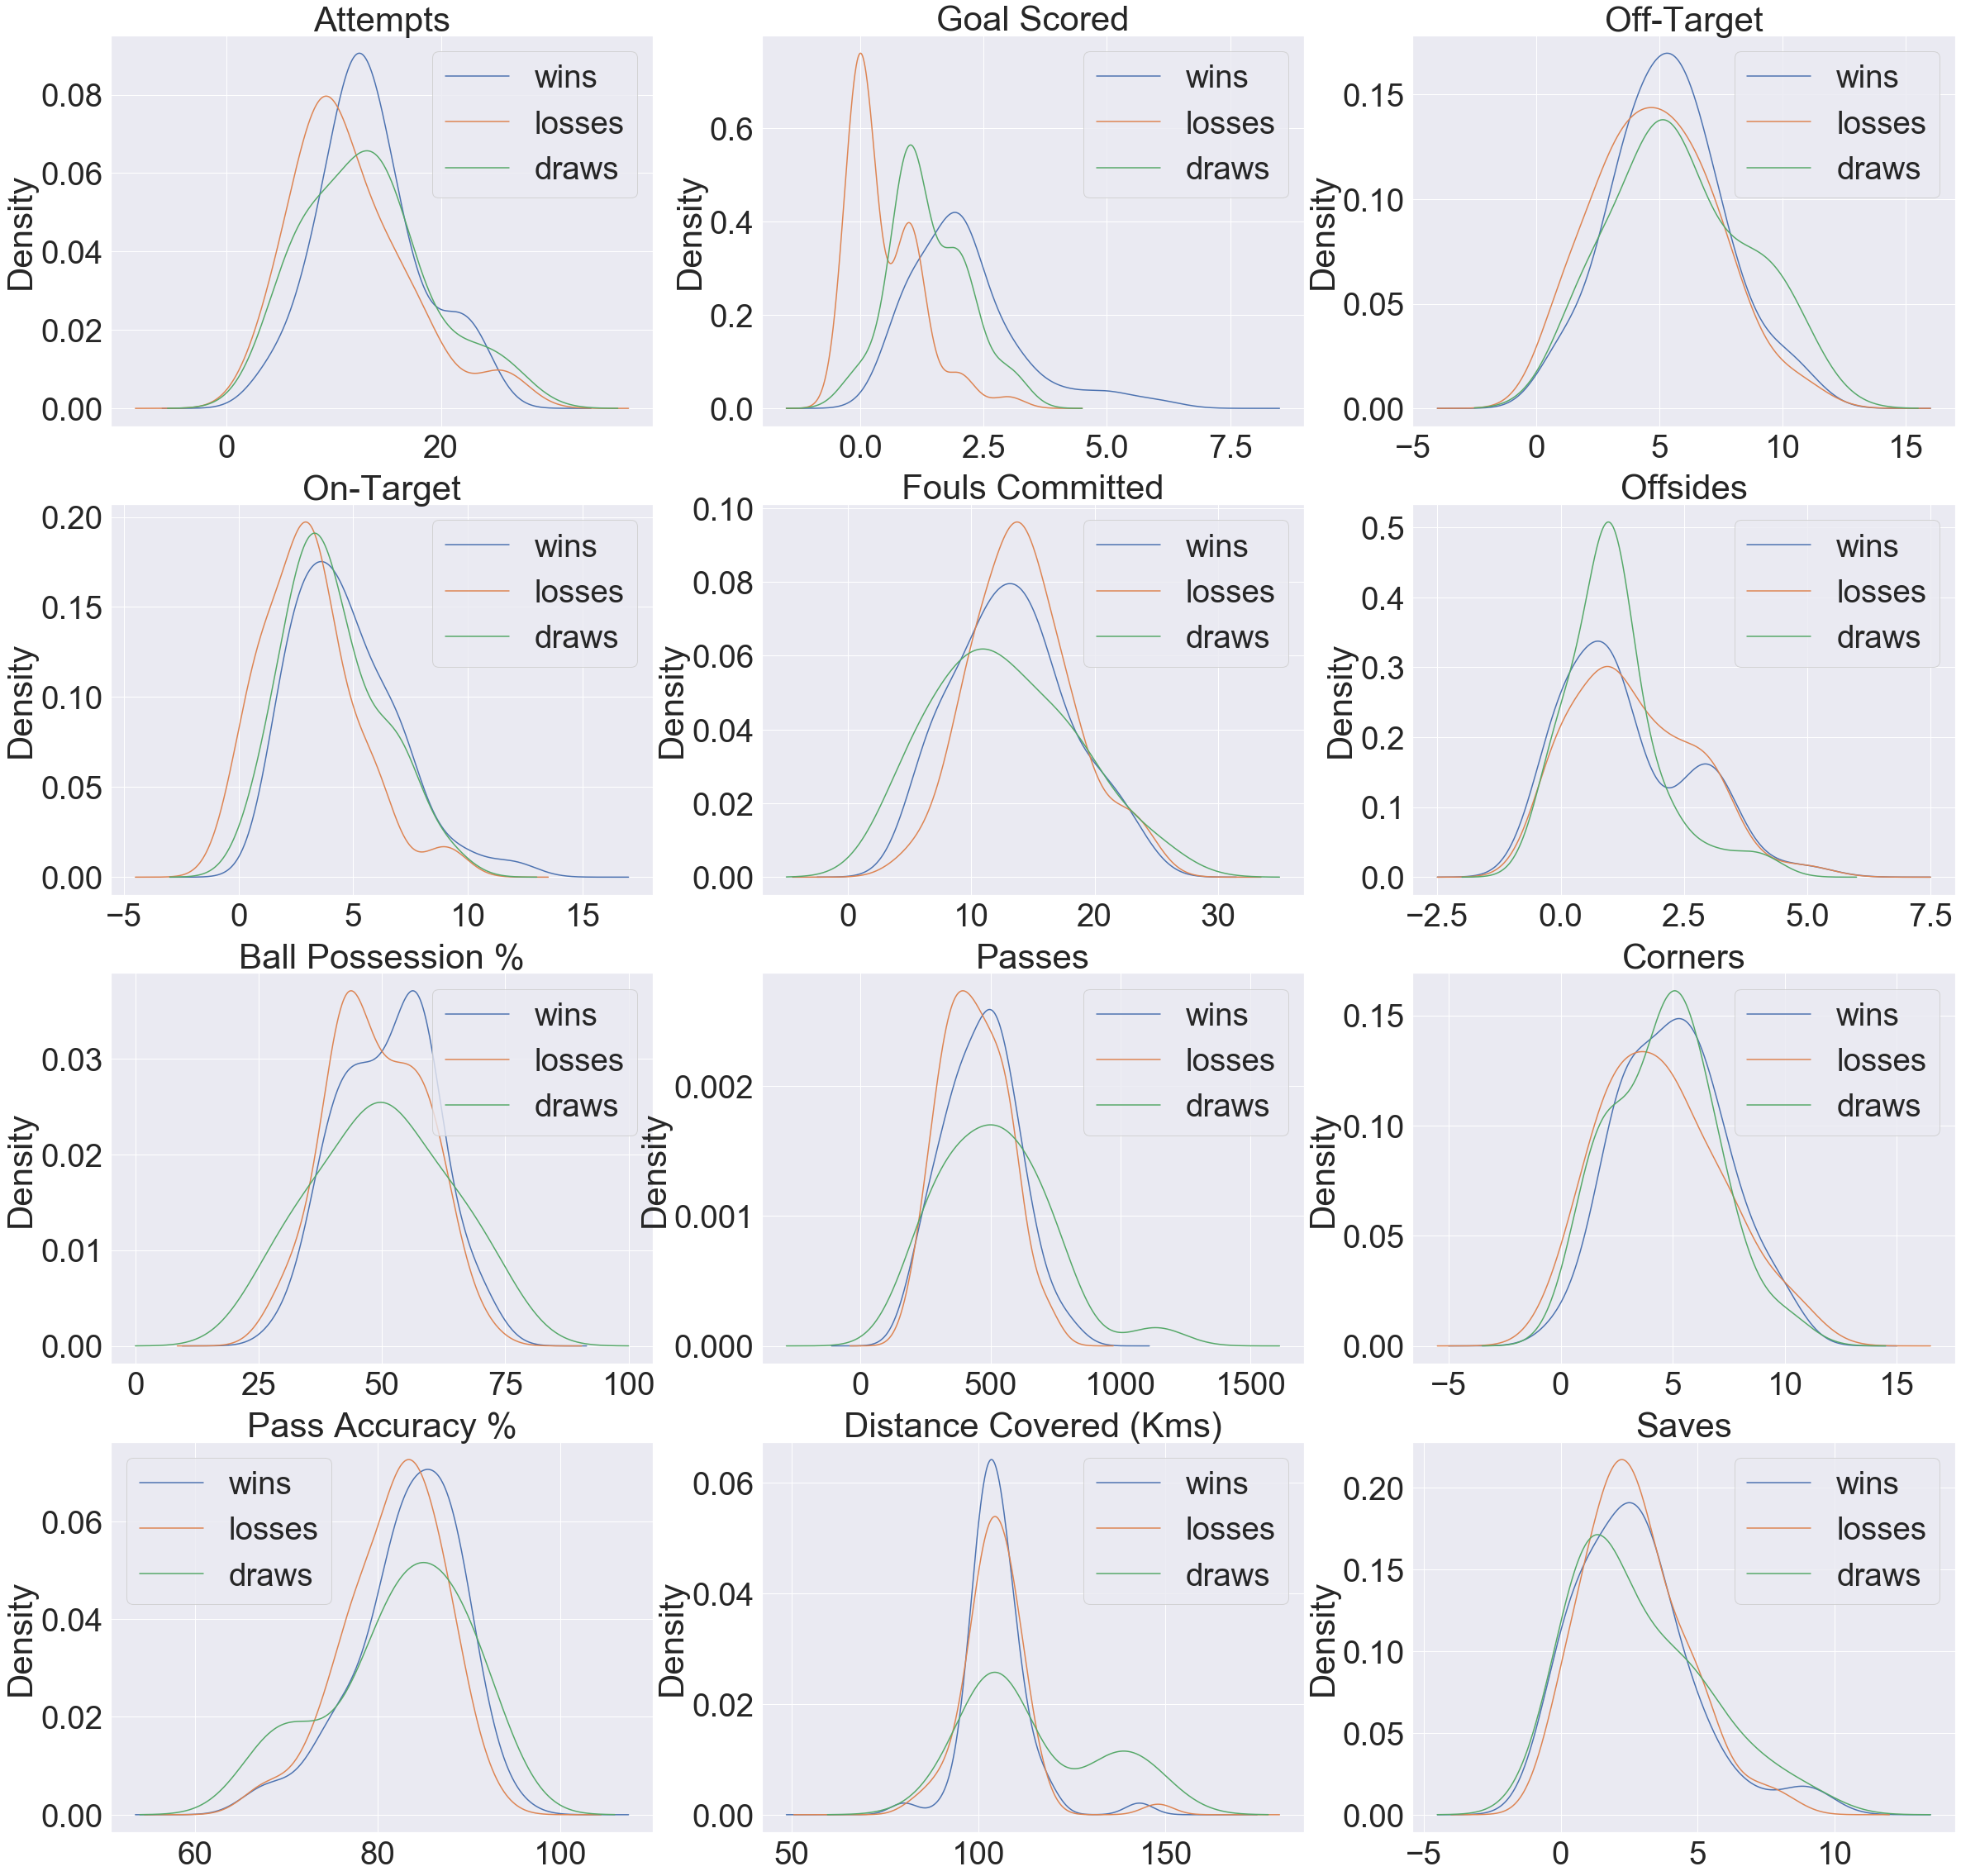

In [12]:
plot_cols(['Attempts', 'Goal Scored', 'Off-Target', 'On-Target', 'Fouls Committed', 'Offsides', 'Ball Possession %', 'Passes','Corners','Pass Accuracy %','Distance Covered (Kms)','Saves'])

# Bivariate Analysis

Correlation Plot

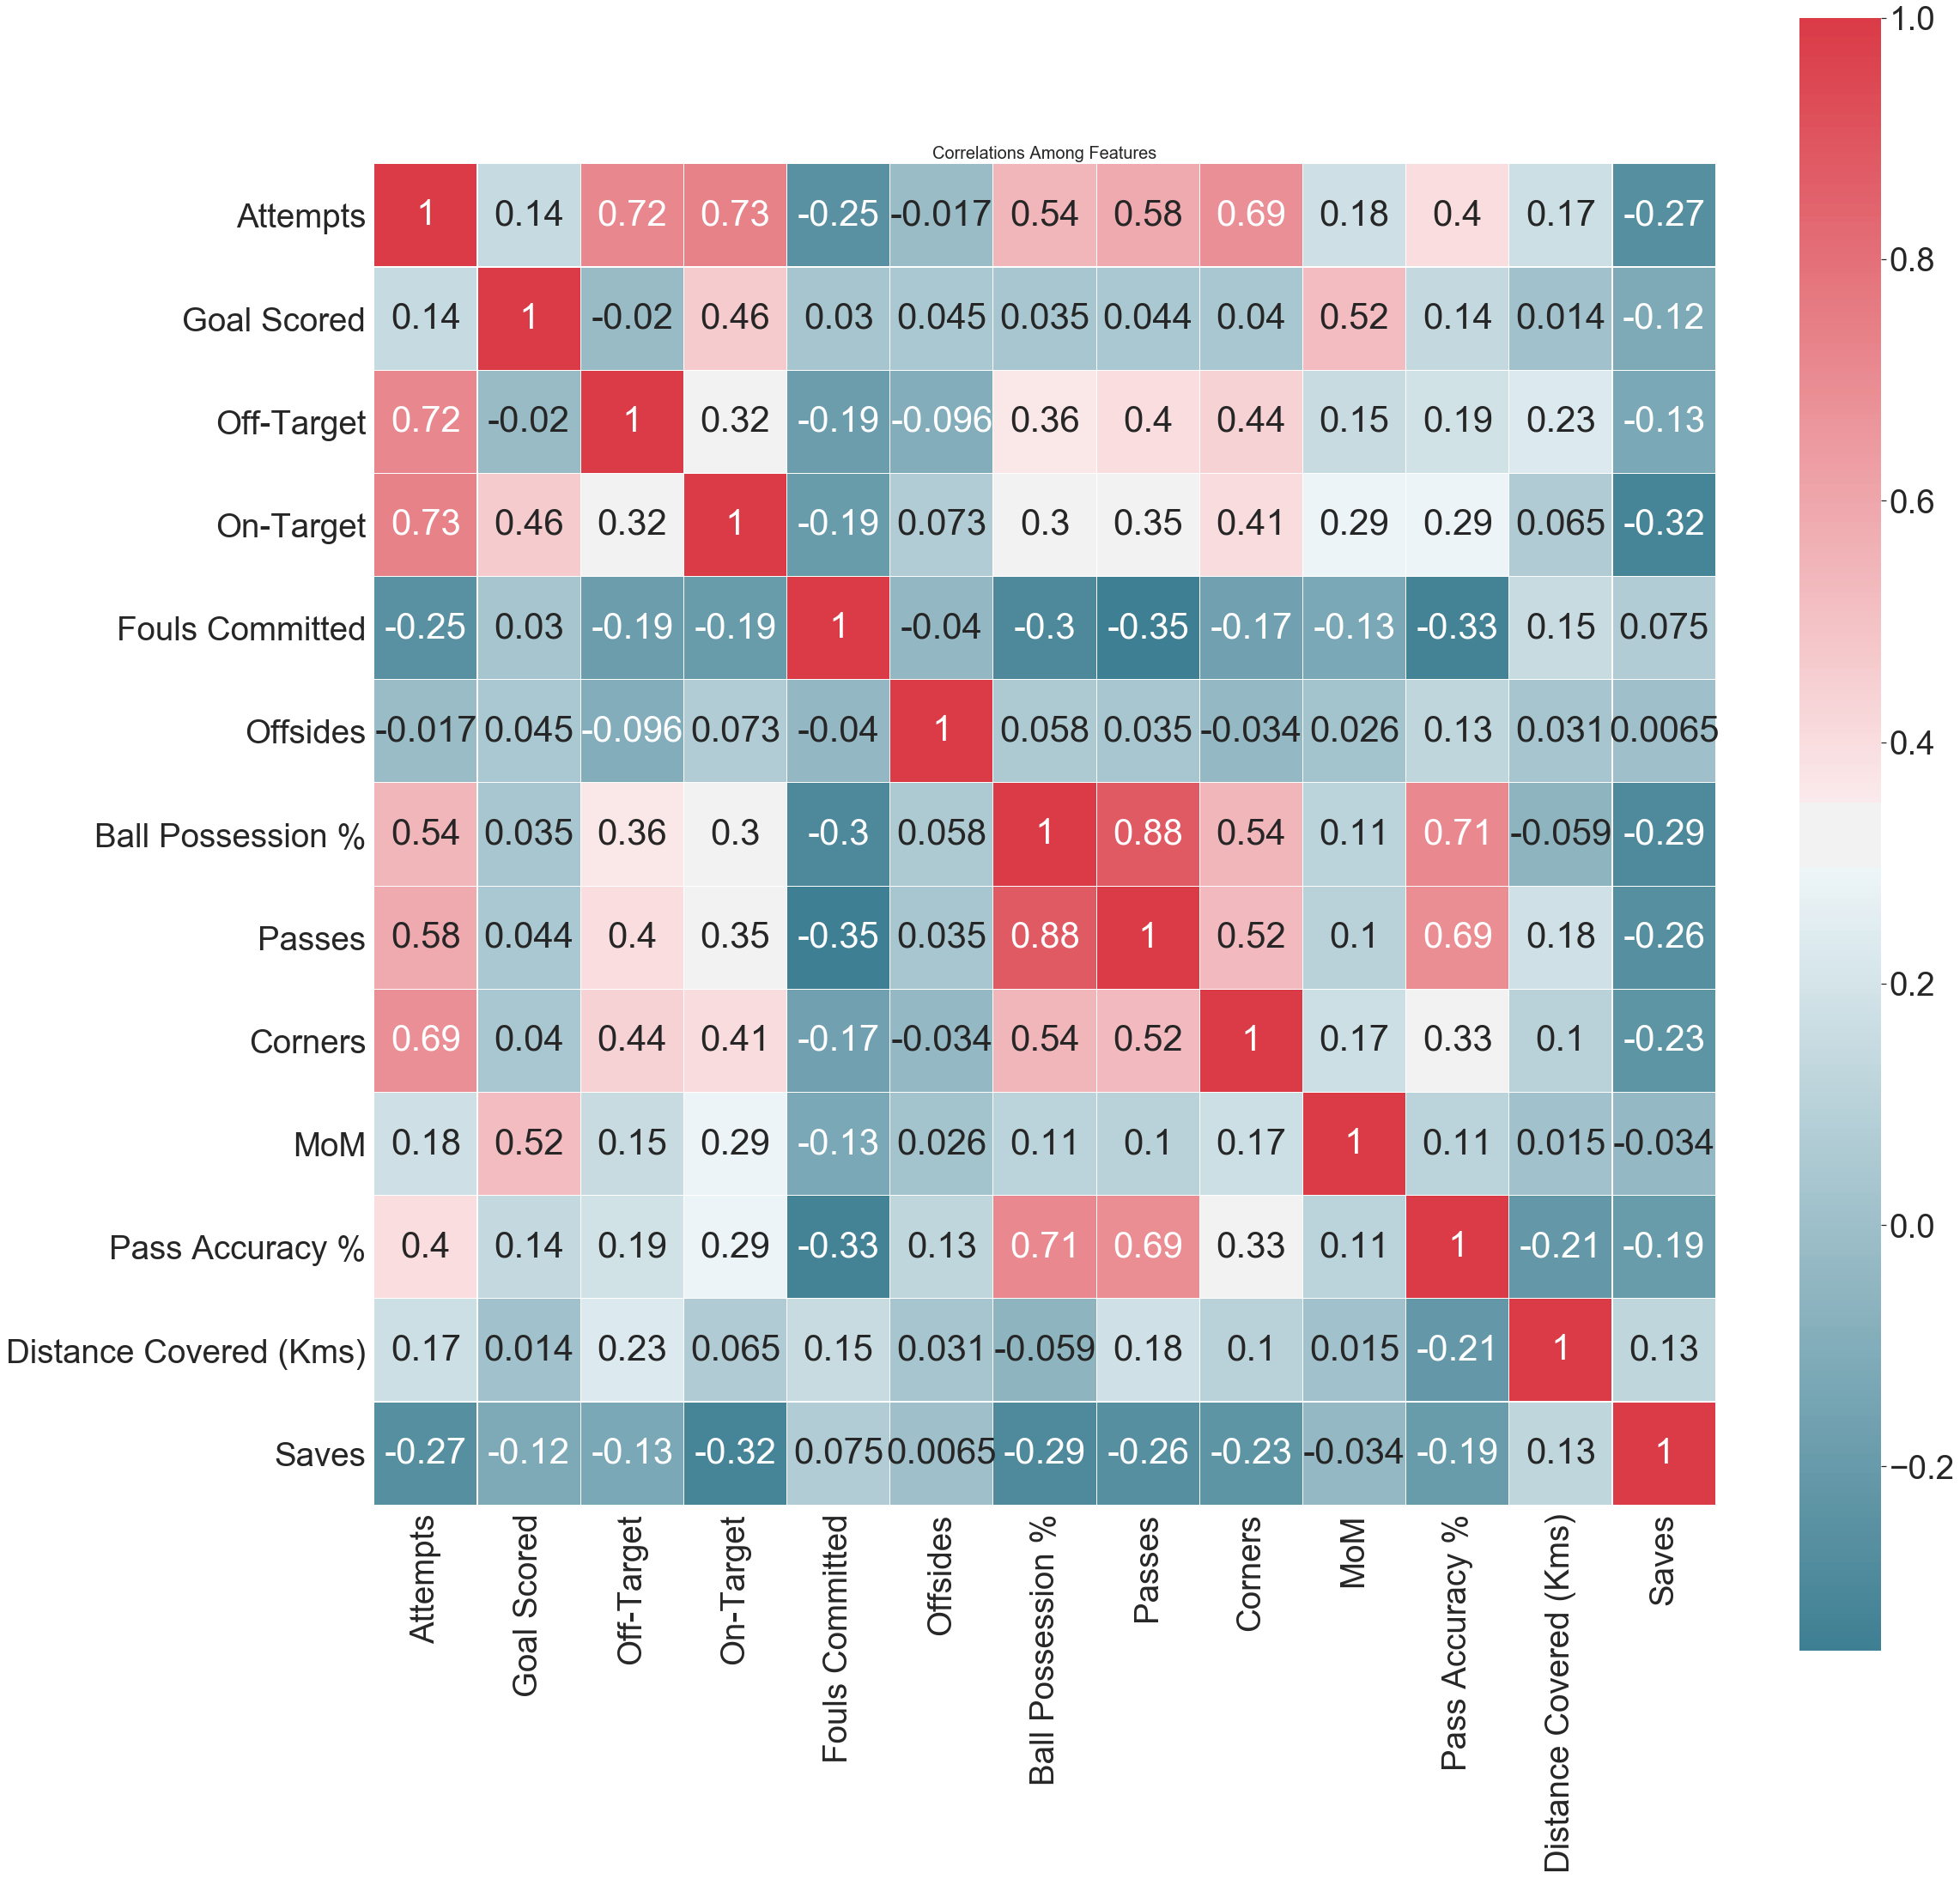

In [13]:
sub = ['Attempts', 'Goal Scored', 'Off-Target', 'On-Target', 'Fouls Committed', 'Offsides', 'Ball Possession %', 'Passes','Corners','MoM','Pass Accuracy %','Distance Covered (Kms)','Saves']
data = data_file[sub]
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(font_scale=3.5)
plt.subplots(figsize = (35,35))
sns.heatmap(data.corr(), 
            annot=True,
            cmap = cmap,
            linewidths=0.1, 
            linecolor='white',
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

# relationship between ball possesion % and passes

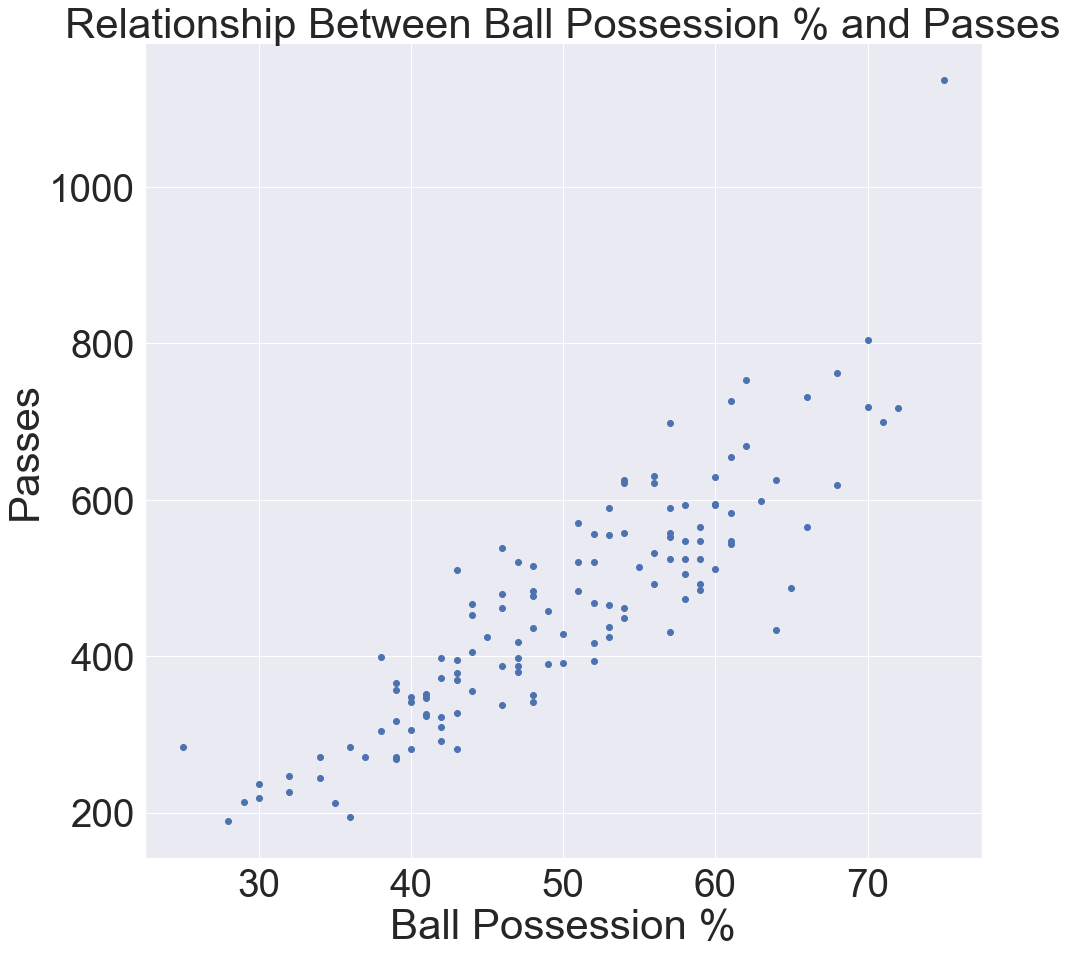

In [14]:
plt.figure(figsize = (15,15))
plt.scatter(x="Ball Possession %", y="Passes", data=data_file)
plt.xlabel("Ball Possession %")
plt.ylabel("Passes")
plt.title('Relationship Between Ball Possession % and Passes')
plt.show()

# relationship between attempts and corner

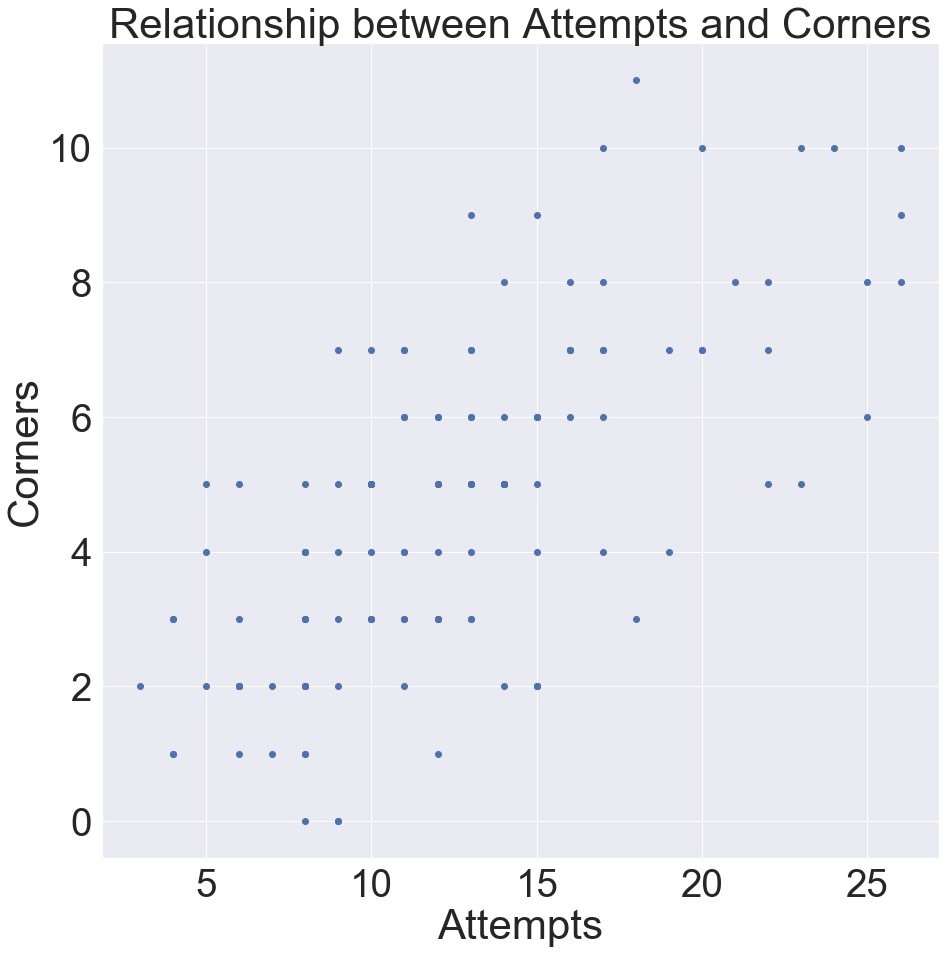

In [15]:
plt.figure(figsize = (15,15))
plt.scatter(x="Attempts", y="Corners", data=data_file)
plt.xlabel("Attempts")
plt.ylabel("Corners")
plt.title("Relationship between Attempts and Corners")
plt.show()

# Total Yellow cards recieved

Text(0.5, 1.0, 'Total yellow cards')

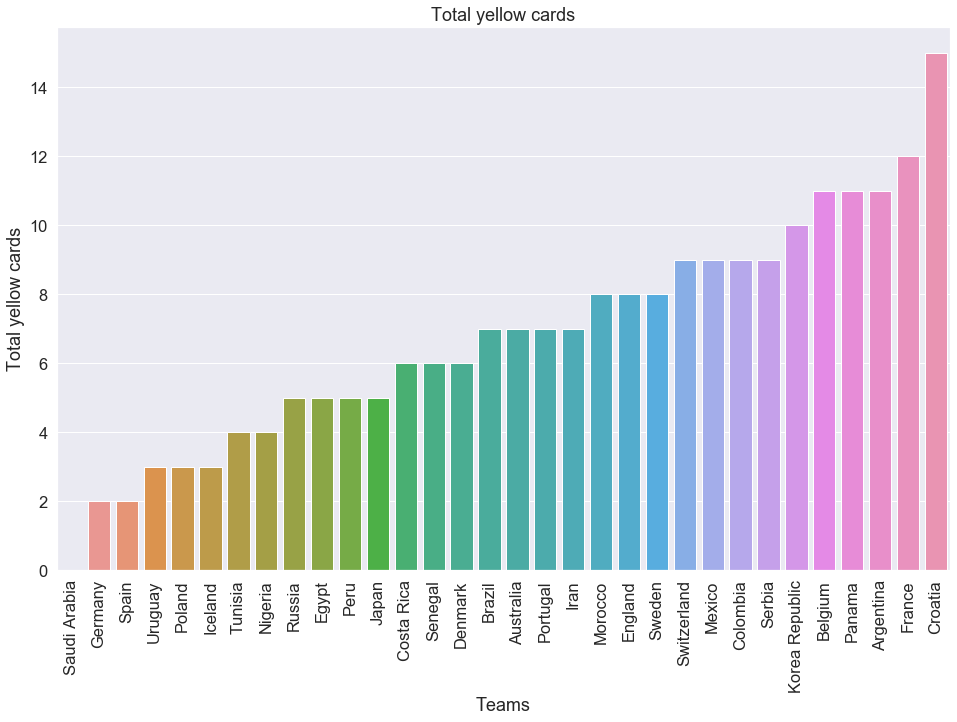

In [16]:
yellow_cards_data = data_file.groupby('Team')['Yellow Card'].sum().reset_index().sort_values(by=('Yellow Card'), ascending=True)

plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Yellow Card", data=yellow_cards_data)

plot1.set_xticklabels(yellow_cards_data['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total yellow cards')
plot1.set_title('Total yellow cards')

#### Total Red Cards Received

As was seen from the initial data analysis. Only players from two teams have received Red Cards these are Columbia and Switzerland. They both got 1 red card each.

## Univariate Analysis

Text(0.5, 1.0, 'Most Man of the Match awards')

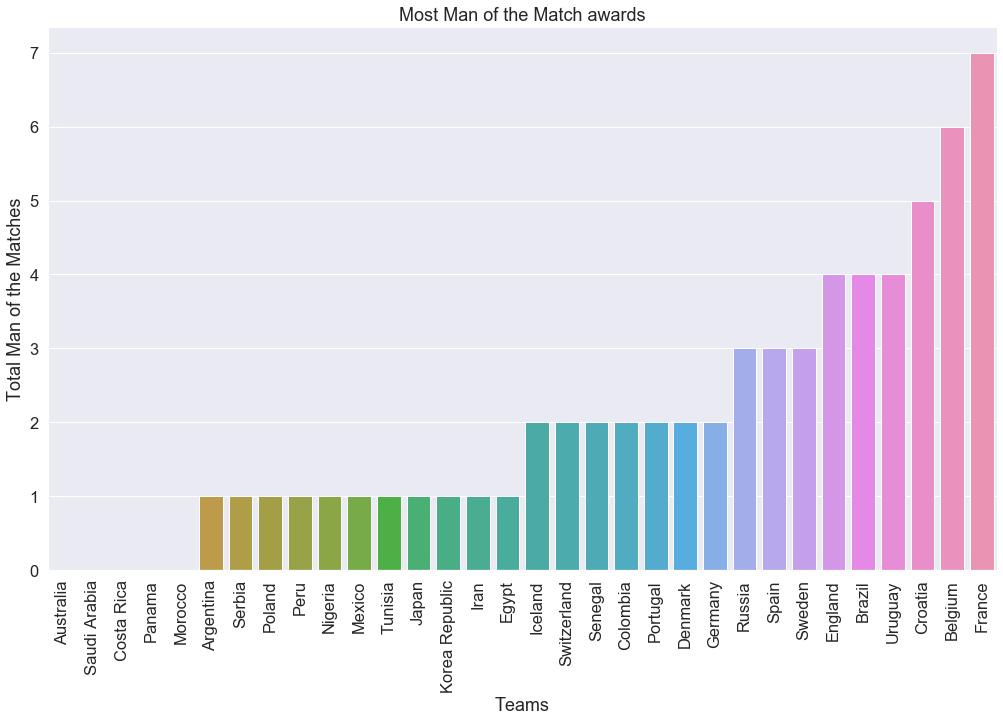

In [17]:
mom_data = data_file.groupby('Team')['MoM'].sum().reset_index().sort_values(by=('MoM'),ascending=True)

plt.figure(figsize = (17, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="MoM", data=mom_data)

plot1.set_xticklabels(mom_data['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Man of the Matches')
plot1.set_title('Most Man of the Match awards')

Here it can be seen that Australia, Saudi Arabia,  Costa Rica, Panama and Morocco have won zero Man of the Match awards. Most were won by France, the team which eventually went onto win the world cup.

## Radar Chart

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


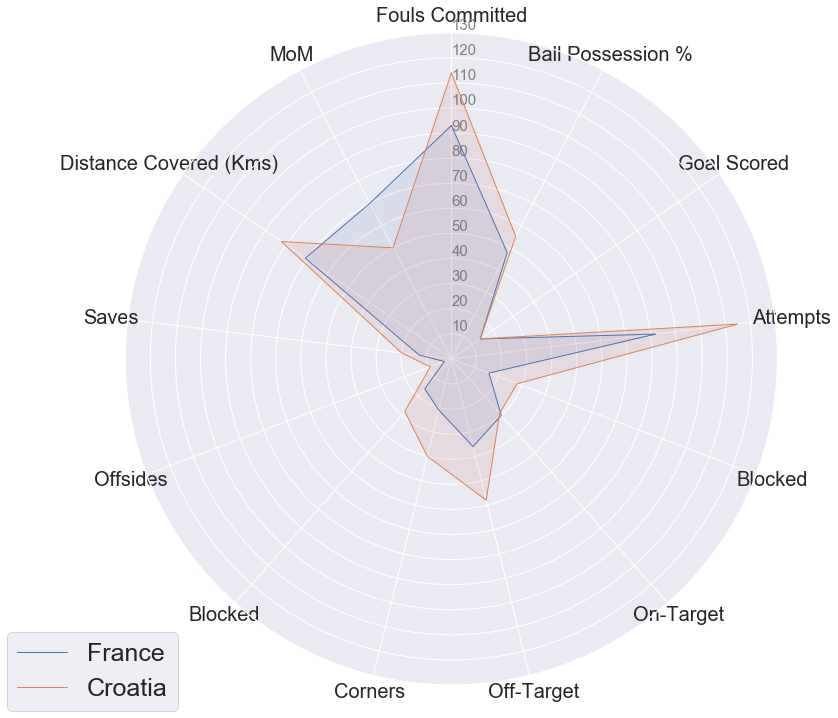

In [18]:
from math import pi

categories=np.array(['Fouls Committed', 'Ball Possession %', 'Goal Scored', 'Attempts', 'Blocked', 'On-Target', 'Off-Target', 'Corners', 'Blocked', 'Offsides', 'Saves', 'Distance Covered (Kms)', 'MoM'])
features_cumulative = data_file.groupby('Team')['Fouls Committed', 'Ball Possession %', 'Goal Scored', 'Attempts', 'Blocked', 'On-Target', 'Off-Target', 'Corners', 'Offsides', 'Saves', 'Distance Covered (Kms)', 'MoM'].sum().reset_index()

features_cumulative['Distance Covered (Kms)'] = features_cumulative['Distance Covered (Kms)']/10
data_file.groupby('Team').count()
features_cumulative['Ball Possession %'] = features_cumulative['Ball Possession %']/7
features_cumulative['MoM']=features_cumulative['MoM']*10

stats=features_cumulative.loc[10,categories].values 
stats=np.concatenate((stats,[stats[0]]))  #Closes the plot

# Setting an angle (we divide the plot / number of variable)
angles=np.linspace(0, 2*np.pi, len(categories), endpoint=False)   
angles=np.concatenate((angles,[angles[0]]))

# Initialising the radar plot
plot1 = plt.figure(figsize=(12, 12))
plot1 = plt.subplot(111, polar=True,)

plot1.set_theta_offset(pi / 2)
plot1.set_theta_direction(-1)
 
plt.xticks(angles[:], categories, size=20)
 
# Draw ylabels
plot1.set_rlabel_position(0)
plt.yticks([10,20,30, 40, 50, 60, 70 , 80 , 90 , 100, 110, 120, 130], ["10","20","30","40", "50", "60",  '70' , '80' , '90' , '100', '110', '120', '130'], color="grey", size=15)
plt.ylim(0,130)
 
#France plot
plot1.plot(angles, stats, linewidth=1, linestyle='solid', label="France")
plot1.fill(angles, stats, 'b', alpha=0.1)
 
#Croatia plot
stats=features_cumulative.loc[6,categories].values 
stats=np.concatenate((stats,[stats[0]]))
plot1.plot(angles, stats, linewidth=1, linestyle='solid', label="Croatia")
plot1.fill(angles, stats, 'r', alpha=0.1)  #alpha sets the opacity
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 25})

## Man of Match Prediction

encoding categorical variables

In [19]:
data_file.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow & Red,Red,MoM,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,Result
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,1,12.0,Group Stage,No,0,0.0,0.0,1.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,0.0,Group Stage,No,0,0.0,0.0,-1.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,0,0,0,0.0,Group Stage,No,0,0.0,0.0,-1.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,1,89.0,Group Stage,No,0,0.0,0.0,1.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,0,0,0,0.0,Group Stage,No,0,1.0,90.0,-1.0


In [20]:
Team = pd.get_dummies(data_file['Team'], prefix = 'Team', drop_first = True)
Opponent = pd.get_dummies(data_file['Opponent'], prefix = 'Opponent', drop_first = True)
Round = pd.get_dummies(data_file['Round'], prefix = 'Round', drop_first = True)
PSO = pd.get_dummies(data_file['PSO'], prefix = 'PSO', drop_first = True)

data_file.drop(['Team', 'Opponent', 'Round', 'PSO', 'Date'], inplace = True, axis = 1)
data_file = pd.concat([data_file,Team,Opponent, Round, PSO],axis=1)

In [21]:
data_file.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_Yes
0,5,40,13,7,3,3,6,3,11,0,...,0,0,0,0,0,1,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,...,0,0,0,0,0,1,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,...,0,0,0,1,0,1,0,0,0,0
3,1,57,14,4,6,4,5,1,13,3,...,0,0,0,0,0,1,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,...,0,0,0,0,0,1,0,0,0,0


## Feature Importance

Using Permutation Importance
For this we follow these steps:

1. Get a trained model
2. Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.
3. Return the data to the original order (undoing the shuffle from step 2 and repeat step 2 with the next column in the dataset, until we have calculated the importance of each column.

In [22]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=None)

# X is the feature set and y is the target
y = data_file['MoM']
X = data_file.drop('MoM', axis=1)
#feature_names = [i for i in data_NoMoM.columns if data_NoMoM[i].dtype in [np.int64]]
#X = data_NoMoM[feature_names]

for train_index, test_index in skf.split(X,y): 
    #print("Train:", train_index, "Test:", test_index) 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


## Using Machine Learning Models to Predict Man of the Match

### Data Preparation
Data has already been split into Training and Test sets using stratified k-fold cross validation.

### Using The Decision Tree Classifier

Decision tree is a type of supervised learning algorithm.
It works for both categorical and continuous input and output variables. In this technique, we split the sample into two or more homogeneous sets based on most significant splitter / differentiator in input variables.

A decision tree is drawn upside down with its root at the top. An internal node is actually a condition based on which the tree splits into branches/ edges. The end of the branch that doesn’t split anymore is the decision/leaf.

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
DTree_Model = DecisionTreeClassifier()
DTree_Model.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=DTree_Model, X=X_train, y=y_train, cv=10)
dt_model_accuracy = accuracies.mean()
dt_model_standard_deviation = accuracies.std()
print("model accuracy", dt_model_accuracy)
print("model standard deviation", dt_model_standard_deviation)

model accuracy 0.7845454545454545
model standard deviation 0.11691983550229747


In [26]:
confusion_matrix(y_test, DTree_Model.predict(X_test))

array([[9, 4],
       [3, 9]], dtype=int64)

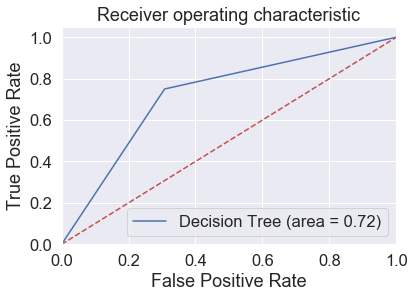

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

area_under_curve = roc_auc_score(y_test, DTree_Model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DTree_Model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

Recall : Proportion of correct positive classification (True positives) from cases that are actually positive. <br>
Recall = TP/(TP+FN) = True Positive/ Actual Positives<br>
<br>
Precision : Proportion of correct positive classification (True positives) from cases that are predicted as positive. <br>
Precision = TP/(TP+FP) = True Positive/ Predicted Positives <br>
<br>
F1-Score : The F1 score conveys the balance between the precision and the recall. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).<br>
F1-Score = 2x((precision x recall)/(precision+recall))


In [28]:
from sklearn import metrics
predicted = DTree_Model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.69      0.75      0.72        12

    accuracy                           0.72        25
   macro avg       0.72      0.72      0.72        25
weighted avg       0.72      0.72      0.72        25



### Using The Random Forest Classifier

Random Forest is a supervised learning algorithm. It is an ensemble of Decision Trees. It uses the bagging method which is that a combination of learning models increases the overall result.


In [29]:
RForest_Model = RandomForestClassifier()
RForest_Model.fit(X_train, y_train)

accuracies = cross_val_score(estimator=RForest_Model, X=X_train, y=y_train, cv=10)
rf_model_accuracy = accuracies.mean()
rf_model_standard_deviation = accuracies.std()
print("model accuracy", rf_model_accuracy)
print("model standard deviation", rf_model_standard_deviation)

model accuracy 0.8145454545454545
model standard deviation 0.10342881929693014


In [30]:
confusion_matrix(y_test, RForest_Model.predict(X_test))

array([[11,  2],
       [ 0, 12]], dtype=int64)

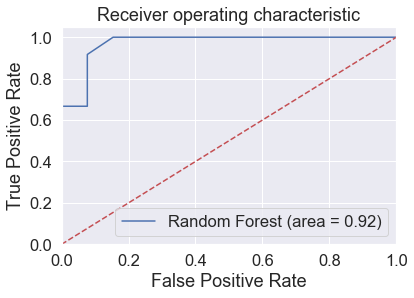

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

area_under_curve = roc_auc_score(y_test, RForest_Model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RForest_Model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [32]:
from sklearn import metrics
predicted = RForest_Model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



### Using The Gradient Boosting Classifier

The idea of boosting came out of the idea of whether a weak learner can be modified to become better.
A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.

We go through cycles that repeatedly builds new models and combines them into an ensemble model. We start the cycle by calculating the errors for each observation in the dataset. We then build a new model to predict those. We add predictions from this error-predicting model to the "ensemble of models."

To make a prediction, we add the predictions from all previous models. We can use these predictions to calculate new errors, build the next model, and add it to the ensemble.


In [33]:
from xgboost import XGBClassifier
GBoost_Model = XGBClassifier(learning_rate = 0.05, n_estimators= 100, max_depth = 4)
GBoost_Model.fit(X_train, y_train)

accuracies = cross_val_score(estimator=GBoost_Model, X=X_train, y=y_train, cv=10)
xgb_model_accuracy = accuracies.mean()
xgb_model_standard_deviation = accuracies.std()
print("model accuracy", xgb_model_accuracy)
print("model standard deviation", xgb_model_standard_deviation)

model accuracy 0.8336363636363636
model standard deviation 0.12485032361105487


In [34]:
confusion_matrix(y_test, GBoost_Model.predict(X_test))

array([[10,  3],
       [ 0, 12]], dtype=int64)

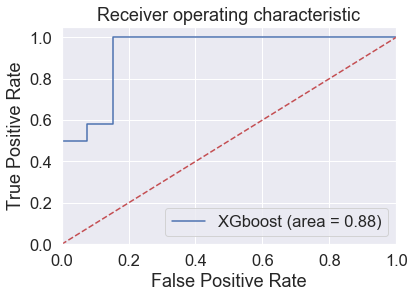

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

area_under_curve = roc_auc_score(y_test, GBoost_Model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GBoost_Model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGboost (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [36]:
from sklearn import metrics
predicted = GBoost_Model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.80      1.00      0.89        12

    accuracy                           0.88        25
   macro avg       0.90      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25



### Using SVC

-SVM can be used to do binary classification <br>
-SVM finds a hyper-plane (line in 2d, plane in 3d, etc) that separates its training data in such a way that the distance between the hyper plane and the closest points from each class is maximized. <br>
-once SVM finds this hyper-plane, you can classify new data points by seeing which side of this hyper-plane they land on <br>
-SVM can only be used on data that is linearly separable (i.e. a hyper-plane can be drawn between the two groups)

#### y = w<sup>T</sup> + b
y : classification label
w : parameters of the plane
b : moves hyperplane in and out of the origin

Hyperplane is also known as the decision boundary, it separates the two classes of data. While also having the property of being the most further away from both classes.
Equation for the hyperplane is <br>w<sup>T</sup> + b = 0
![](https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [38]:
X_train_scaled.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_Yes
0,3.119578,-0.921656,0.162365,1.444941,-0.889133,-0.090377,0.607681,1.240296,-0.892304,-1.346377,...,-0.173205,-0.173205,-0.173205,-0.201008,0.0,0.270031,0.0,-0.270031,0.0,-0.173205
1,-1.108271,0.914526,-1.183211,-1.750772,-0.889133,-0.090377,-1.061416,-0.366628,2.215672,-0.311475,...,-0.173205,-0.173205,-0.173205,-0.201008,0.0,0.270031,0.0,-0.270031,0.0,-0.173205
2,-1.108271,-0.646229,-0.798761,-0.381181,-0.889133,-0.513504,-1.895965,-0.366628,-1.780296,0.205976,...,-0.173205,-0.173205,-0.173205,4.974937,0.0,0.270031,0.0,-0.270031,0.0,-0.173205
3,-0.262701,0.639098,0.354590,0.075350,0.412962,0.332751,0.190407,-0.366628,-0.448307,0.205976,...,-0.173205,-0.173205,-0.173205,-0.201008,0.0,0.270031,0.0,-0.270031,0.0,-0.173205
4,-1.108271,1.281762,0.162365,-0.381181,0.412962,0.332751,0.190407,-1.170091,-0.226309,-0.311475,...,-0.173205,-0.173205,-0.173205,-0.201008,0.0,0.270031,0.0,-0.270031,0.0,-0.173205


In [39]:
from sklearn.svm import SVC
svc_cls = SVC()
svc_cls.fit(X_train_scaled, y_train)
svc_accuracy = accuracy_score(y_test, svc_cls.predict(X_test_scaled))
print('accuracy score', svc_accuracy)

accuracy score 0.88


In [40]:
print('confusion matrix')
print(confusion_matrix(y_test, svc_cls.predict(X_test_scaled)))

confusion matrix
[[10  3]
 [ 0 12]]


In [41]:
from sklearn import metrics
predicted = svc_cls.predict(X_test_scaled)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.80      1.00      0.89        12

    accuracy                           0.88        25
   macro avg       0.90      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25



Accuracy for Decision Tree 78.45454545454545
Accuracy for Random Forest 81.45454545454544
Accuracy for Gradient Boost Classifier 83.36363636363636
Accuracy for Support Vector Classifier 88.0


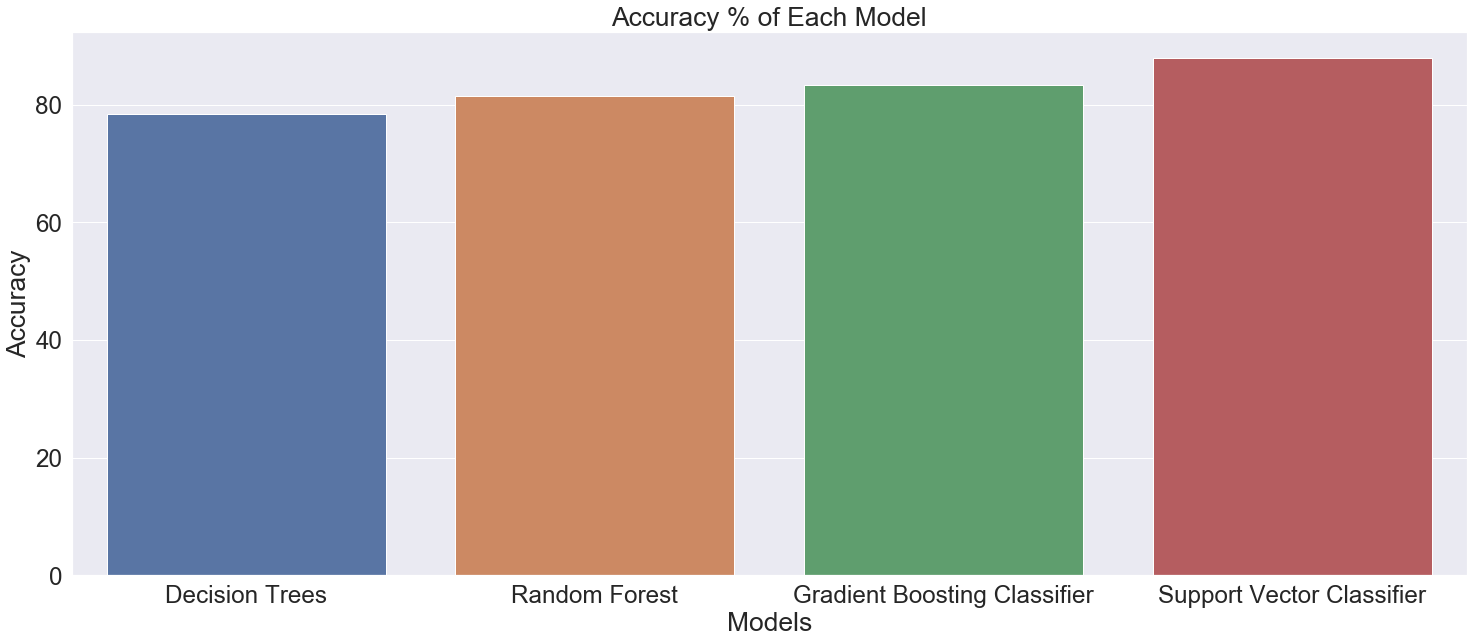

In [42]:
plt.figure(figsize = (25,10))

arr = np.array((dt_model_accuracy*100))
arr = np.append(arr, (rf_model_accuracy*100))
arr = np.append(arr, (xgb_model_accuracy*100))
arr = np.append(arr, (svc_accuracy*100))
ser = pd.Series(arr)
print('Accuracy for Decision Tree', arr[0])
print('Accuracy for Random Forest', arr[1])
print('Accuracy for Gradient Boost Classifier', arr[2])
print('Accuracy for Support Vector Classifier', arr[3])

sns.set(font_scale=2.2)
sns.set_style("darkgrid")
Models_labels = ['Decision Trees', 'Random Forest', 'Gradient Boosting Classifier', 'Support Vector Classifier']
plot1 = sns.barplot(x=Models_labels, y=ser)

plot1.set_xticklabels(Models_labels, ha="center")
plot1.set(xlabel='Models',ylabel='Accuracy')
plot1.set_title('Accuracy % of Each Model')
plt.show()